# Assignment 2 (10 Marks)

Please submit this file only.

Name: Steven Tohme

Student ID:  

## Question 1

Please use this same dataset as in Assignment 1 for the following plot:

Visualize the time series for Regular Unleaded Gasoline prices in Ottawa from 2000 to 2023. Smooth the time series using a simple moving average with a window size of 40. Plot both the original time series and its trend in one plot.

Your visualization should be complete.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('energy-price.csv')

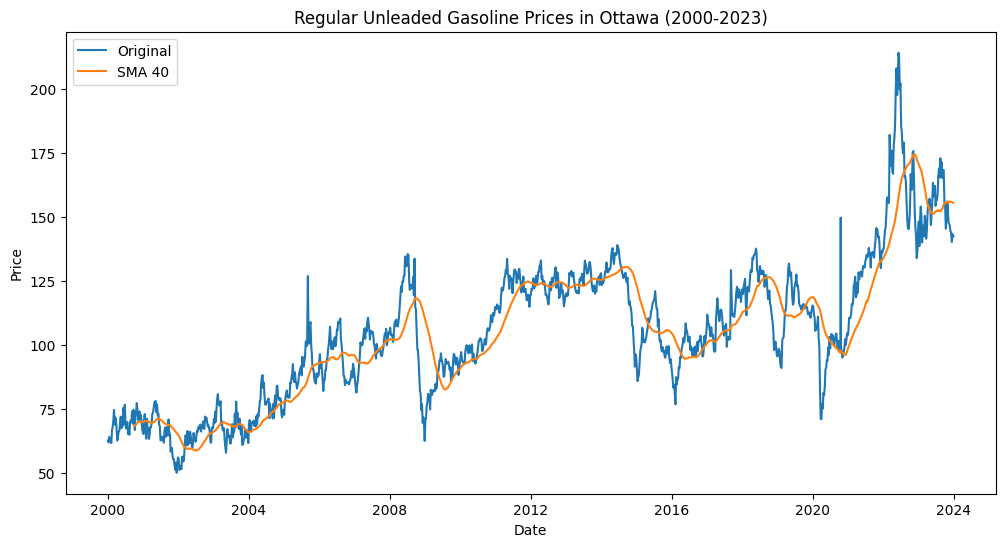

In [19]:

df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Fuel Type'] == 'Regular Unleaded Gasoline') & (df['Date'].dt.year.between(2000, 2023)) & (df['Ottawa'].notna())]
df = df.sort_values('Date')


# Plot the original time series
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Ottawa'], label='Original')

# Calculate and plot the moving average
df['SMA_40'] = df['Ottawa'].rolling(window=40).mean()
plt.plot(df['Date'], df['SMA_40'], label='SMA 40')

plt.title('Regular Unleaded Gasoline Prices in Ottawa (2000-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Question 2

Please plot a map of Canada showing the volcanoes and earthquakes, with the earthquakes' magnitude represented by color. Your visualization should be complete.

Data sources:
https://github.com/plotly/datasets/blob/master/volcano_db.csv
https://earthquakescanada.nrcan.gc.ca/stndon/NEDB-BNDS/bulletin-en.php

In [20]:
import pandas as pd
import geopandas 
import matplotlib.pyplot as plt
from shapely.geometry import Point



## volcanoes in the world
volcano = pd.read_csv('volcano_db.csv', encoding = "ISO-8859-1")
## world map
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
canada = world[world['name'] == 'Canada']

## earthquakes in Canada
earthquake = pd.read_csv('earthquake.txt',sep='|')

/var/folders/fy/65pxmkd172l43p40h9mqvdjw0000gn/T/ipykernel_60570/3603929834.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


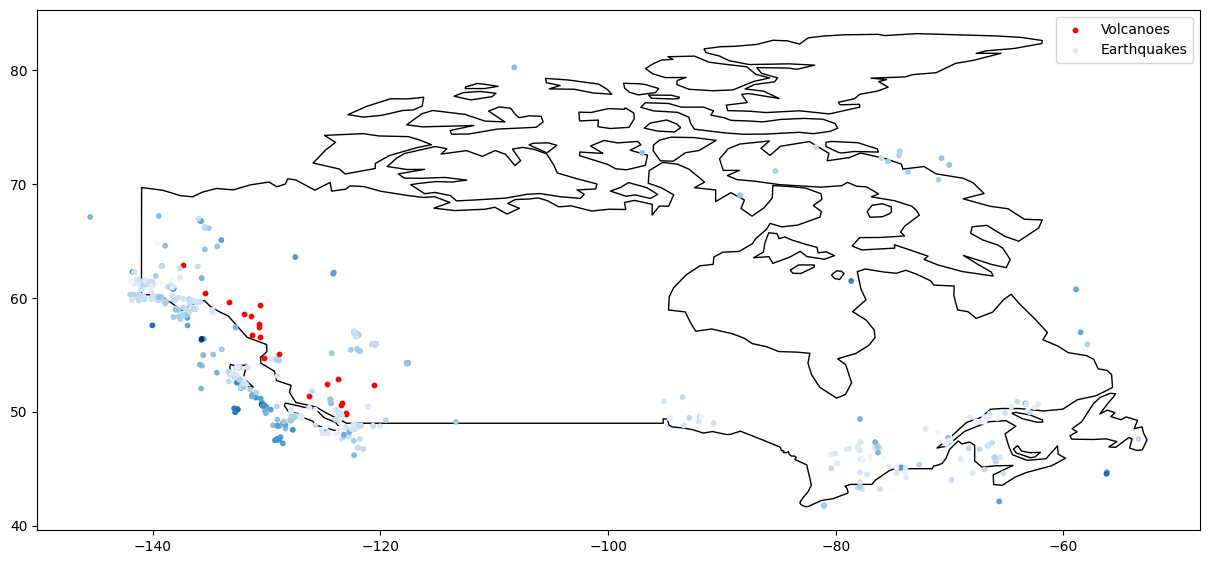

In [21]:

# Convert the volcano DataFrame to a GeoDataFrame
volcano['Coordinates'] = list(zip(volcano.Longitude, volcano.Latitude))
volcano['Coordinates'] = volcano['Coordinates'].apply(Point)
volcano = geopandas.GeoDataFrame(volcano, geometry='Coordinates')
volcano['in_canada'] = volcano.within(canada.unary_union)
volcano = volcano[volcano['in_canada']]

earthquake['Coordinates'] = list(zip(earthquake.Longitude, earthquake.Latitude))
earthquake['Coordinates'] = earthquake['Coordinates'].apply(Point)
earthquake = geopandas.GeoDataFrame(earthquake, geometry='Coordinates')
earthquake['Magnitude'] = (earthquake['Magnitude'] - earthquake['Magnitude'].min()) / (earthquake['Magnitude'].max() - earthquake['Magnitude'].min())


# Plot the world map
fig, ax = plt.subplots(figsize=(15,10))
canada.plot(ax=ax, color='white', edgecolor='black')

# Plot the volcanoes
volcano.plot(ax=ax, color='red', markersize=10, label='Volcanoes')

# Plot the earthquakes
earthquake.plot(ax=ax, markersize=10, column='Magnitude', cmap='Blues', legend=False, label='Earthquakes')


plt.legend()
plt.show()